# ML Lab
## Part 1 Preprocessing and EDA

In [20]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import re
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [6]:
 orders = pd.read_csv('data/Orders.csv', index_col=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185AD15B5F8>,
      dtype=object)

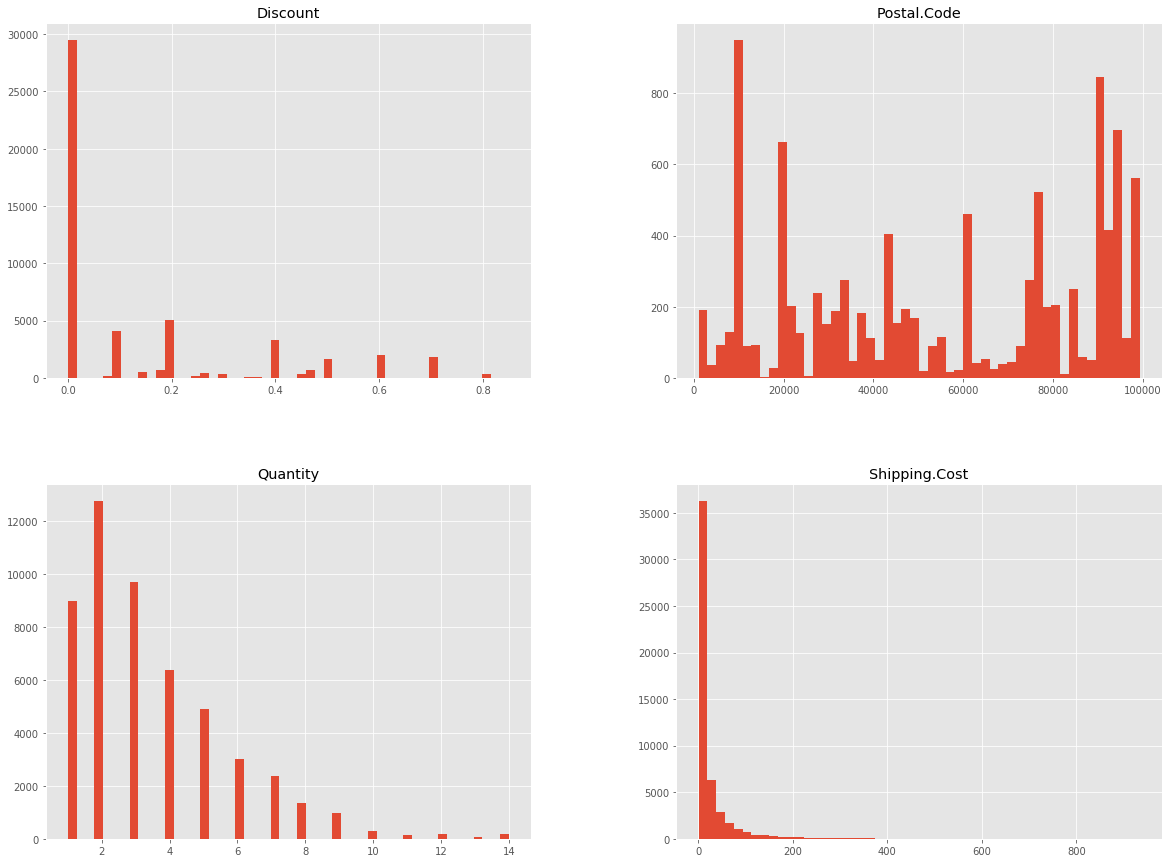

In [12]:
orders.hist(bins=50, figsize=(20,15))

In [11]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [26]:
orders['Sales'] = orders['Sales'].replace('[\$,]', '', regex=True).astype(float)
orders['Profit'] = orders['Profit'].replace('[\$,]', '', regex=True).astype(float)